In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import statsmodels.api as s

In [2]:
restaurant_data = pd.read_excel('Week-7-Files/lrm.xlsx')
restaurant_data

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


[Text(0, 0.5, 'Quarterly Sales (In Dollars)'),
 Text(0.5, 0, 'Student Population (In Thousands)')]

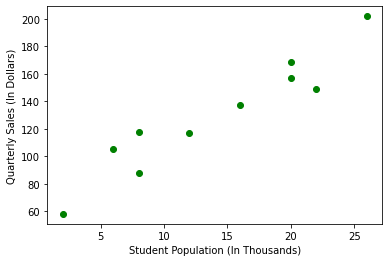

In [39]:
fig,axes = plt.subplots()
axes.scatter(restaurant_data['Student_Population'],restaurant_data.Sales, color = 'green')
axes.set(ylabel = 'Quarterly Sales (In Dollars)',xlabel = 'Student Population (In Thousands)')

In [10]:
from sklearn.model_selection import train_test_split

Since data has few data points, train_test_split is not done and entire data is used for training the model

In [13]:
X = restaurant_data.Student_Population.values.reshape(-1,1)
y = restaurant_data.Sales.values.reshape(-1,1)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 88)

In [17]:
reg = LinearRegression()
model = reg.fit(X,y)
print(f'Y intercept for linear regression: {model.intercept_}')

Y intercept for linear regression: [60.]


In [18]:
print(f'Slope for linear regression: {model.coef_}')

Slope for linear regression: [[5.]]


In [19]:
model

LinearRegression()

In [30]:
y_pred = model.predict(X)

[Text(0, 0.5, 'Quarterly Sales (In Thousand Dollars)'),
 Text(0.5, 0, 'Student Population (In Thousands)')]

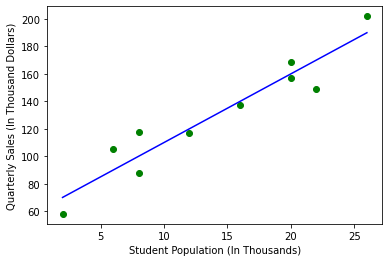

In [38]:
fig,axes = plt.subplots()
axes.scatter(restaurant_data['Student_Population'],restaurant_data.Sales, color = 'green')
axes.plot(X,y_pred,color = 'blue')
axes.set(ylabel = 'Quarterly Sales (In Thousand Dollars)',xlabel = 'Student Population (In Thousands)')

**Note:** The point estimate of an individual value of y is the **same** as the point estimate for the mean value of y.

Thus, the **predicted quarterly sales for an individual restaurant with 10,000 students = estimated mean quarterly sales of all restaurants with 10,000 students = 110,000 dollars**

In [37]:
reg.predict([[10]])

array([[110.]])

In [41]:
import seaborn as sns

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


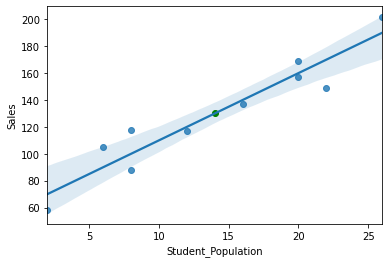

In [42]:
# Another way of plotting regression lines
x = restaurant_data['Student_Population']
y = restaurant_data['Sales']
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color = 'green')

The shaded area represents the **estimated confidence interval for the mean value of y i.e. E(y) for the corresponding x value**.

## Prediction Interval

In [43]:
from statsmodels.stats.outliers_influence import summary_table

### **Note:** 
### * OLS(All caps) located inside 's' is used for summary table and confidence interval estimation
### * ols(all small) located inside 'sm' is used for ANOVA and Residual Analysis

In [49]:
y = restaurant_data['Sales']
X = s.add_constant(restaurant_data['Student_Population'])
model1 = s.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           2.55e-05
Time:                        00:32:04   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
st,data1,ss2 = summary_table(model1,alpha = 0.05)

In [51]:
st

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,58.0,69.99999999999996,8.222585693865266,51.038683389280415,88.9613166107195,32.89834154784006,107.10165845215985,-11.999999999999957,11.119311332409136,-1.0792035263032795,0.3184474325136641
2.0,105.0,89.99999999999997,6.377640298311583,75.293135100338,104.70686489966194,54.88172260110569,125.11827739889425,15.000000000000028,12.270929232350424,1.2224013125635858,0.2018193294387599
3.0,88.0,99.99999999999997,5.589854995725687,87.1097712656196,112.89022873438034,65.60291394444252,134.39708605555742,-11.999999999999972,12.649249824663935,-0.9486728593660919,0.08787685396914899
4.0,118.0,99.99999999999997,5.589854995725687,87.1097712656196,112.89022873438034,65.60291394444252,134.39708605555742,18.00000000000003,12.649249824663935,1.4230092890491437,0.1977229214305868
5.0,117.0,119.99999999999997,4.524580752502433,109.56629807543696,130.433701924563,86.44610800310326,153.55389199689668,-2.9999999999999716,13.068212158290226,-0.2295646844160567,0.0031586717422392115
6.0,137.0,140.0,4.524580752502434,129.56629807543698,150.43370192456302,106.44610800310329,173.5538919968967,-3.0,13.068212158290226,-0.2295646844160589,0.0031586717422392727
7.0,157.0,160.0,5.5898549957256884,147.10977126561963,172.89022873438037,125.60291394444255,194.39708605555745,-3.0,12.649249824663935,-0.23716821484152356,0.005492303373071842
8.0,169.0,160.0,5.5898549957256884,147.10977126561963,172.89022873438037,125.60291394444255,194.39708605555745,9.0,12.649249824663935,0.7115046445245706,0.04943073035764657
9.0,149.0,170.0,6.377640298311585,155.29313510033802,184.70686489966198,134.8817226011057,205.1182773988943,-21.0,12.270929232350422,-1.7113618375890167,0.39556588569996814


In [54]:
fitted_values = data1[:,2]
fitted_values

array([ 70.,  90., 100., 100., 120., 140., 160., 160., 170., 190.])

In [55]:
predict_mean_se = data1[:,3]
predict_mean_se

array([8.22258569, 6.3776403 , 5.589855  , 5.589855  , 4.52458075,
       4.52458075, 5.589855  , 5.589855  , 6.3776403 , 8.22258569])

In [57]:
predict_mean_ci_low,predict_mean_ci_upp = data1[:,4:6].T
predict_ci_low, predict_ci_upp = data1[:,6:8].T

In [58]:
# Lower limit of confidence interval
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [59]:
# Upper limit of confidence interval
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [60]:
# Lower limit of prediction interval
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [61]:
# Upper limit of prediction interval
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

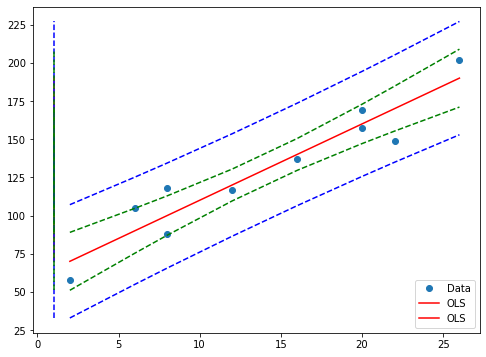

In [67]:
fig,ax = plt.subplots(figsize = (8,6))
ax.plot(x,y,'o',label = 'Data')
ax.plot(X,fitted_values,'r-',label = 'OLS')
ax.plot(X,predict_ci_low,'b--')
ax.plot(X,predict_ci_upp,'b--')
ax.plot(X,predict_mean_ci_low,'g--')
ax.plot(X,predict_mean_ci_upp,'g--')
ax.legend(loc = 'best')